In [1]:
import lr

import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
import pprint

In [2]:
# load and process the iris data
# keep only two features (sepal length, sepal width) for easy visualization
def create_iris_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    data = np.array(df.iloc[:100, [0, 1, -1]])
    return data[:, :-1], data[:, -1]

In [3]:
X_iris, Y_iris = create_iris_data()
Y_iris = np.array([1 if i == 1 else 0 for i in Y_iris])
X_train, X_test, y_train, y_test = train_test_split(X_iris, Y_iris, test_size=0.3) # shuffle and split the data set

In [13]:
# create the model
model = lr.LogisticRegression(max_iter=100, learning_rate=0.1)
model.fit(X_train, y_train.reshape(-1, 1))

Step: 10, Cost: 0.6335033048691757
Step: 20, Cost: 0.5883082972450544
Step: 30, Cost: 0.5487842060480387
Step: 40, Cost: 0.5141174055906491
Step: 50, Cost: 0.4835984368529099
Step: 60, Cost: 0.45661907159549125
Step: 70, Cost: 0.4326635099505046
Step: 80, Cost: 0.4112971210642733
Step: 90, Cost: 0.3921548074423296


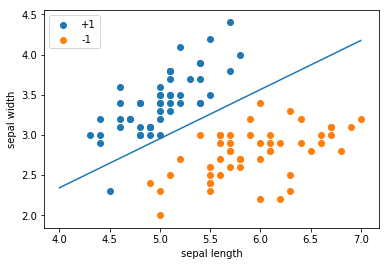

In [14]:
x_points = np.linspace(4, 7,10)
y_ = -(model.w_[0] * x_points + model.b_) / model.w_[1]
plt.plot(x_points, y_)

plt.scatter(X_iris[:50, 0], X_iris[:50, 1], label='+1')
plt.scatter(X_iris[50:, 0], X_iris[50:, 1], label='-1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [17]:
test_acc = model.score(X_test, y_test)
print("test accurcy: " + str(test_acc))

test accurcy: 1.0
